# DDOS attack Detection
### Creating a platform that can detect DDOS attacks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installing modules
! pip install pandas numpy matplotlib seaborn scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [122]:
# reading Data

df=pd.read_csv("/content/drive/MyDrive/attack_dataset.csv")
df

,No.,Source,Destination,Version,Protocol,Length,Header Length,Total Length,Identification,TTL,Header Checksum,Attack
0,1.0,227.31.230.124,192.168.198.130,4.0,ICMP,42.0,20.0,52.0,0xacfc,128.0,0x0000,0.0
1,2.0,57.106.193.234,192.168.198.130,4.0,ICMP,42.0,20.0,52.0,0xacfd,128.0,0x0000,0.0
2,3.0,187.134.238.55,192.168.198.130,4.0,ICMP,42.0,20.0,52.0,0x4c53,104.0,0xea46,0.0
3,4.0,1.58.147.123,192.168.198.130,4.0,ICMP,42.0,20.0,40.0,0xacfe,128.0,0x0000,0.0
4,5.0,84.28.10.159,192.168.198.130,4.0,ICMP,42.0,20.0,557.0,0xacff,128.0,0x0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

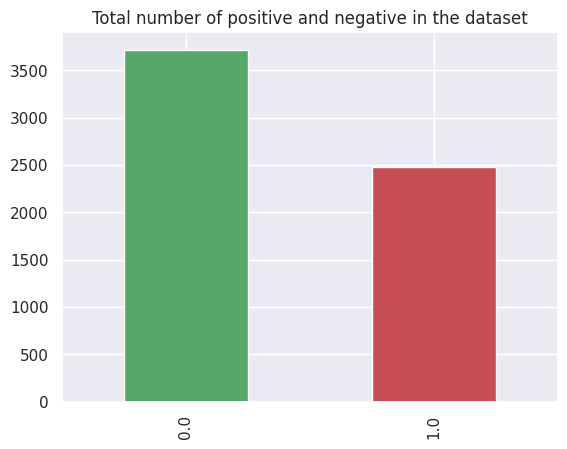

In [125]:
import matplotlib.pyplot as plt
df['Attack'].value_counts().plot.bar(color = ["g","r"])
plt.title('Total number of positive and negative in the dataset')
plt.show()

## I. Data Preprocessing

In [126]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              6200 non-null   float64
 1   Source           6200 non-null   object 
 2   Destination      6200 non-null   object 
 3   Version          6200 non-null   float64
 4   Protocol         6200 non-null   object 
 5   Length           6200 non-null   float64
 6   Header Length    6200 non-null   float64
 7   Total Length     6200 non-null   float64
 8   Identification   6200 non-null   object 
 9   TTL              6200 non-null   float64
 10  Header Checksum  6200 non-null   object 
 11  Attack           6200 non-null   float64
dtypes: float64(7), object(5)
memory usage: 590.8+ KB


In [127]:
df.describe()

,No.,Version,Length,Header Length,Total Length,TTL,Attack
count,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000
mean,3100.500000,4.053548,63.173548,20.000000,104.293548,79.985000,0.400323
std,1789.930166,0.322872,15.247579,0.017962,146.046332,50.190545,0.490003
min,1.000000,4.000000,42.000000,19.000000,22.000000,2.000000,0.000000
25%,1550.750000,4.000000,42.000000,20.000000,38.000000,17.000000,0.000000
50%,3100.500000,4.000000,74.000000,20.000000,49.000000,115.000000,0.000000
75%,4650.250000,4.000000,74.000000,20.000000,110.000000,128.000000,1.000000
max,6200.000000,6.000000,110.000000,21.000000,780.000000,128.000000,1.000000


In [128]:
column_names= df.columns
column_names

Index(['No.', 'Source', 'Destination', 'Version', 'Protocol', 'Length',
       'Header Length', 'Total Length', 'Identification', 'TTL',
       'Header Checksum', 'Attack'],
      dtype='object')

In [ ]:
# df = df.drop(['Header Checksum'], axis=1)
# df = df.drop(['Protocol'], axis=1)
# df = df.drop(['Source'], axis=1)
# df = df.drop(['Destination'], axis=1)
# df = df.drop(['Identification'], axis=1)

In [129]:
df.head()

,No.,Source,Destination,Version,Protocol,Length,Header Length,Total Length,Identification,TTL,Header Checksum,Attack
0,1.0,227.31.230.124,192.168.198.130,4.0,ICMP,42.0,20.0,52.0,0xacfc,128.0,0x0000,0.0
1,2.0,57.106.193.234,192.168.198.130,4.0,ICMP,42.0,20.0,52.0,0xacfd,128.0,0x0000,0.0
2,3.0,187.134.238.55,192.168.198.130,4.0,ICMP,42.0,20.0,52.0,0x4c53,104.0,0xea46,0.0
3,4.0,1.58.147.123,192.168.198.130,4.0,ICMP,42.0,20.0,40.0,0xacfe,128.0,0x0000,0.0
4,5.0,84.28.10.159,192.168.198.130,4.0,ICMP,42.0,20.0,557.0,0xacff,128.0,0x0000,0.0


In [130]:
# column names
column_names= df.columns
column_names

Index(['No.', 'Source', 'Destination', 'Version', 'Protocol', 'Length',
       'Header Length', 'Total Length', 'Identification', 'TTL',
       'Header Checksum', 'Attack'],
      dtype='object')

Text(0, 0.5, 'Count')

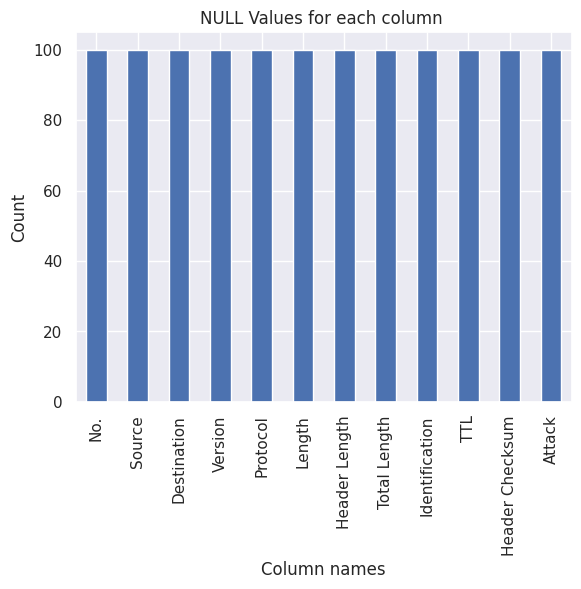

In [131]:
# Null values sum 
df.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("Count")

In [132]:
# Dropping rows having null values
df=df.dropna()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 6199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              6200 non-null   float64
 1   Source           6200 non-null   object 
 2   Destination      6200 non-null   object 
 3   Version          6200 non-null   float64
 4   Protocol         6200 non-null   object 
 5   Length           6200 non-null   float64
 6   Header Length    6200 non-null   float64
 7   Total Length     6200 non-null   float64
 8   Identification   6200 non-null   object 
 9   TTL              6200 non-null   float64
 10  Header Checksum  6200 non-null   object 
 11  Attack           6200 non-null   float64
dtypes: float64(7), object(5)
memory usage: 629.7+ KB


In [134]:
# Getting unique destination 
uniq_dest=df['Destination'].unique()
total_dst=len(uniq_dest)
print("Total destination : ", total_dst)
print("Different destination : ",uniq_dest)

Total destination :  7
Different destination :  ['192.168.198.130' '192.168.79.132' 'Broadcast' '192.168.79.2'
 'VMware_9d:39:10' 'VMware_97:2f:1e' '192.168.251.29']


Text(0.5, 1.0, 'Traffic for normal and Malicious traffic')

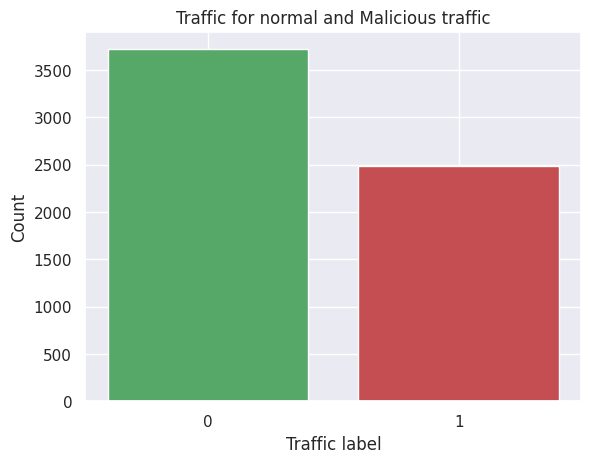

In [135]:
# Doing analysis for malicious and normal traffic 
gp=df.groupby('Attack')['Attack'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")

Text(0.5, 1.0, 'Attack and Normal traffic ')

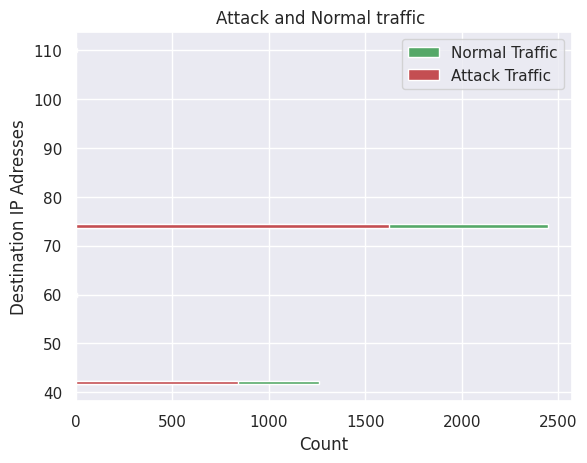

In [136]:
ip_addr=df[df['Attack']==0].groupby('Length').count()['Attack'].index
normal_traffic=df.groupby(['Length','Attack']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['Length','Attack']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='g', label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='r', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Adresses")
plt.title("Attack and Normal traffic ")

In [137]:
# Columns containing object(string) type data
# Port no column also does not do much so ignoring it also
object_col= list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['Header Length']
print(object_col)
data=df.drop(columns=object_col)

# seperating data based on protocol
udp_df = df[df['Attack']=='UDP'].drop(columns=object_col)
tcp_df = df[df['Attack']=='TCP'].drop(columns=object_col)
icmp_df = df[df['Attack']=='ICMP'].drop(columns=object_col)
icmp_df

['Source', 'Destination', 'Protocol', 'Identification', 'Header Checksum', 'Header Length']


,No.,Version,Length,Total Length,TTL,Attack


In [138]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['Attack']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

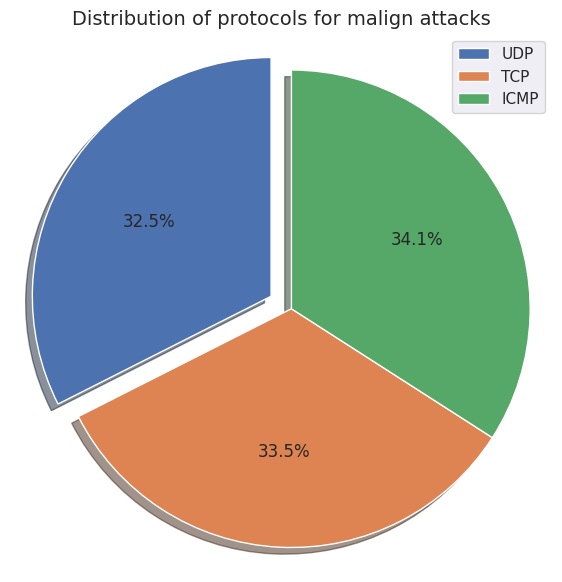

In [139]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

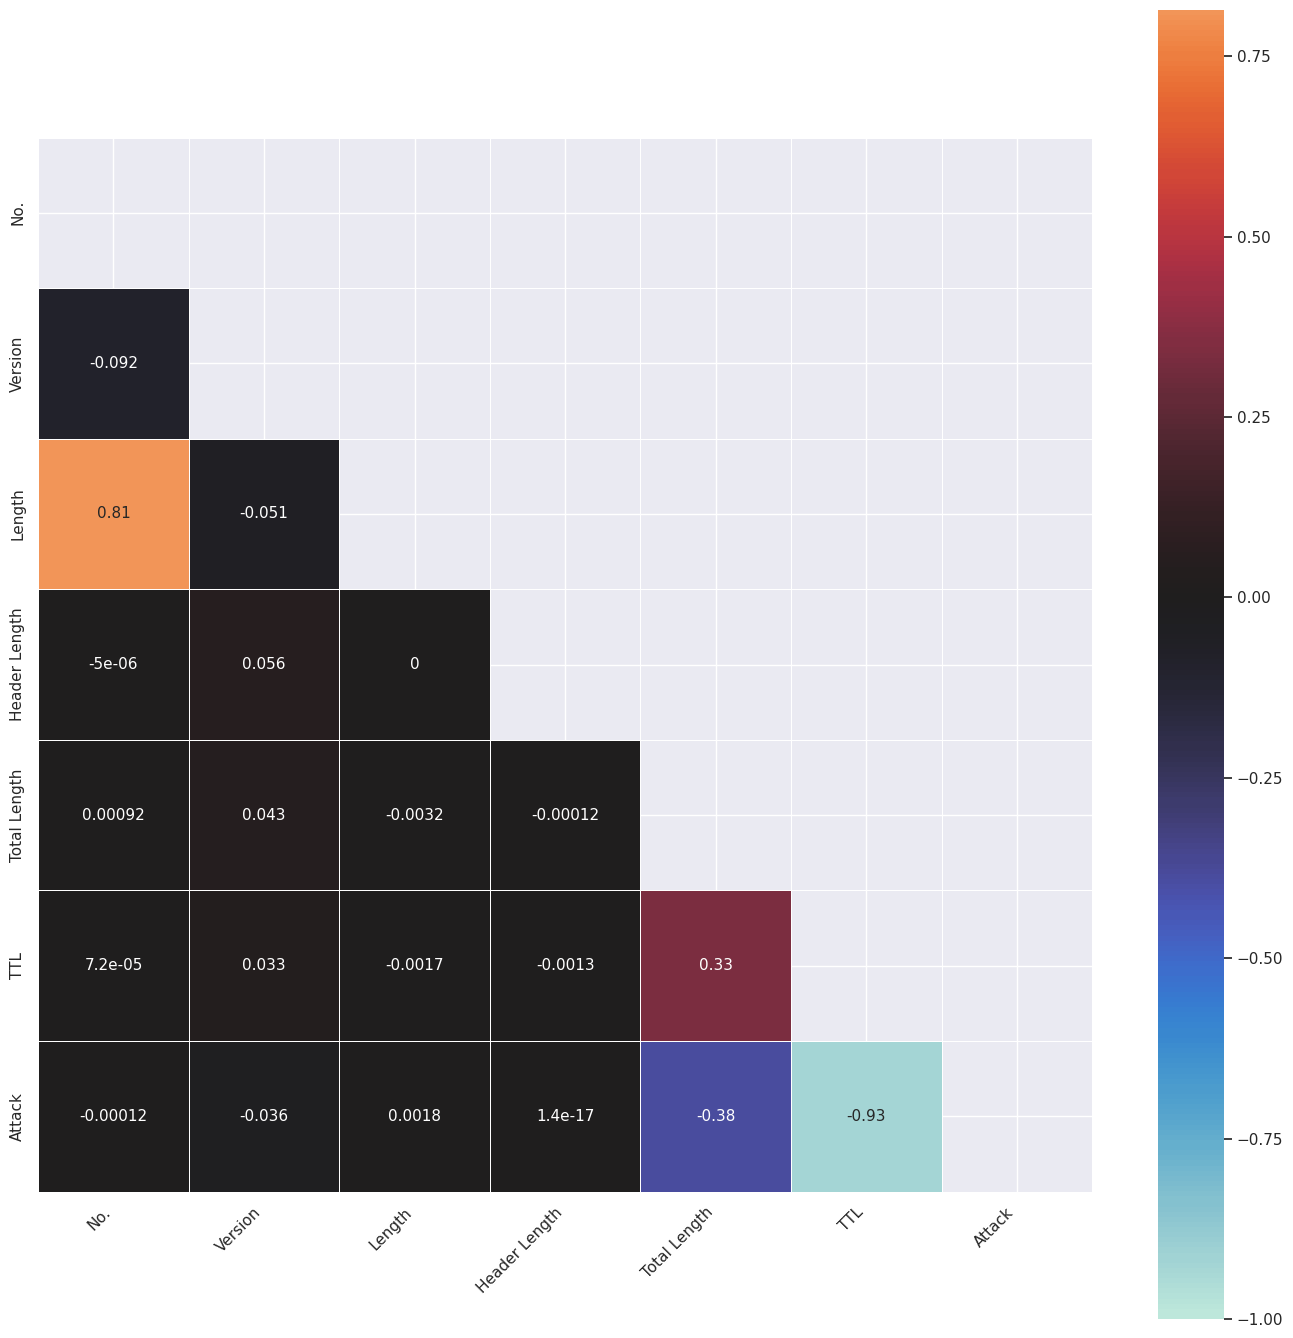

In [140]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(17,17))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

## II. Data Model building

In [141]:
# importin modules for train test split
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

## GMM

### UDP 


In [142]:
# splitting traing and testing data

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X = pd.DataFrame(df, columns=['Version', 'Header Length', 'Total Length', 'TTL']) 

udp_train,udp_test, udp_train_label, udp_test_label = train_test_split(X, df['Attack'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.9290322580645162

### TCP

In [143]:
# splitting traing and testing data

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X = pd.DataFrame(df, columns=['Version', 'Header Length', 'Total Length', 'TTL']) 

tcp_train,tcp_test, tcp_train_label, tcp_test_label = train_test_split(X, df['Attack'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.9290322580645162

### ICMP

In [145]:
# splitting traing and testing data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X = pd.DataFrame(df, columns=['Version', 'Header Length', 'Total Length', 'TTL']) 

icmp_train,icmp_test, icmp_train_label, icmp_test_label= train_test_split(X, df['Attack'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.9290322580645162

## Linear Perceptron

In [146]:
from sklearn.linear_model import Perceptron

#### UDP 

In [150]:
model = Perceptron(random_state=2)
model.fit(udp_train,udp_train_label)
model.score(udp_train,udp_train_label)

1.0

#### TCP

In [151]:
model = Perceptron(random_state=1)
model.fit(tcp_train,tcp_train_label)
model.score(tcp_train,tcp_train_label)

1.0

#### ICMP


In [152]:
model = Perceptron(random_state=1)
model.fit(icmp_train,icmp_train_label)
model.score(icmp_train,icmp_train_label)

1.0

## Multi-Layer perceptron 

In [153]:
from sklearn.neural_network import MLPClassifier

#### UDP

In [154]:
clf= MLPClassifier(hidden_layer_sizes=(16,10),
                  random_state=5,
                  learning_rate_init=0.01)
clf.fit(udp_train,udp_train_label)
metrics.accuracy_score(clf.predict(udp_test), udp_test_label)

1.0

#### TCP 

In [155]:
clf= MLPClassifier(hidden_layer_sizes=(18,12),
          random_state=5,
          learning_rate_init=0.01)
clf.fit(tcp_train,tcp_train_label)
print(metrics.accuracy_score(clf.predict(tcp_test), tcp_test_label))

1.0


#### ICMP 

In [156]:
clf= MLPClassifier(hidden_layer_sizes=(16,10),
                  random_state=5,
                  learning_rate_init=0.01)
clf.fit(icmp_train,icmp_train_label)
metrics.accuracy_score(clf.predict(icmp_test), icmp_test_label)

1.0

## KNN

In [157]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

#### UDP 

In [158]:
# Create feature and target arrays
X = udp_train
y = udp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)

# Calculate the accuracy of the model
print(knn.score(udp_test, udp_test_label))


1.0


#### TCP 

In [159]:
X = tcp_train
y = tcp_train_label


knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)

# Calculate the accuracy of the model
print(knn.score(tcp_test, tcp_test_label))

1.0


#### ICMP

In [171]:
X = icmp_train
y = icmp_train_label

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X, y)

# Calculate the accuracy of the model
print(knn.score(icmp_test, icmp_test_label))

1.0


In [161]:
Classifier_accuracy = []

In [ ]:
# knn_clf = KNeighborsClassifier()
# knn_clf.fit(icmp_train, icmp_train_label)
# y_pred = knn_clf.predict(icmp_test)
# accuracy = metrics.accuracy_score(icmp_test_label, y_pred)
# Classifier_accuracy.append(accuracy*100)
# print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

## SVM

In [162]:
from sklearn import svm

#### UDP 

In [163]:
clf= svm.SVC(kernel='poly')
clf.fit(udp_train,udp_train_label)
clf.score(udp_test,udp_test_label)

0.9827956989247312

#### TCP 

In [166]:
clf= svm.SVC(kernel='poly')
clf.fit(tcp_train,tcp_train_label)
metrics.accuracy_score(clf.predict(tcp_test),tcp_test_label)

0.9827956989247312

#### ICMP

In [167]:
clf= svm.SVC(kernel='poly')
clf.fit(icmp_train,icmp_train_label)
metrics.accuracy_score(clf.predict(icmp_test),icmp_test_label)

0.9827956989247312

###Combined Result of all the 3 attacks

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X = pd.DataFrame(df, columns=['Version', 'Header Length', 'Total Length', 'TTL']) 
X_train, X_test, y_train, y_test = train_test_split(X, df['Attack'], test_size=0.3, random_state=55)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

1.0

In [ ]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.6188172043010752

In [ ]:
from sklearn.preprocessing import MinMaxScaler   
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.6494623655913978

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.6494623655913978

In [ ]:
#Defining Hybrid Ensemble Learning Model
# create the sub-models
estimators = []

In [ ]:
#Defining 5 Gaussian Naive Bayes classifiers
model1 = GaussianNB()
estimators.append(('nbs1', model1))
model2 = GaussianNB()
estimators.append(('nbs2', model2))
model3 = GaussianNB()
estimators.append(('nbs3', model3))
model4 = GaussianNB()
estimators.append(('nbs4', model4))
model5 = GaussianNB()
estimators.append(('nbs5', model5))

In [ ]:
#Defining 5 Bernoulli Naive Bayes classifiers
model6 = BernoulliNB()
estimators.append(('bnbs1', model6))
model7 = BernoulliNB()
estimators.append(('bnbs2', model7))
model8 = BernoulliNB()
estimators.append(('bnbs3', model8))
model9 = BernoulliNB()
estimators.append(('bnbs4', model9))
model10 = BernoulliNB()
estimators.append(('bnbs5', model10))

In [ ]:
#Defining 5 Multinomial Naive Bayes classifiers
model11 = MultinomialNB()
estimators.append(('mnb1', model11))
model12 = MultinomialNB()
estimators.append(('mnb2', model12))
model13 = MultinomialNB()
estimators.append(('mnb3', model13))
model14 = MultinomialNB()
estimators.append(('mnb4', model14))
model15 = MultinomialNB()
estimators.append(('mnb5', model15))

In [ ]:
#To preprocess the data and remove any negative value as MultinomialNB does not work for negative values
from sklearn.preprocessing import MinMaxScaler   
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [ ]:
#Confusionn matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
print(cm_HybridEnsembler)

[[1151    0]
 [ 604  105]]


In [ ]:
#from sklearn.metrics import accuracy_score 
accuracy_score (y_test,y_pred )

0.6752688172043011

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "XGBoost": {"model":XGBClassifier(eval_metric='mlogloss'), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "AdaBoost": {"model":AdaBoostClassifier(n_estimators=100), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration

In [ ]:
models_acc = []
for name, model in models.items():
    models_acc.append([name, model["model"].score(X_test, y_test),model["perf"]])

In [ ]:
df_acc = pd.DataFrame(models_acc)
df_acc.columns = ['Model', 'Accuracy w/o scaling', 'Training time (sec)']
df_acc.sort_values(by = 'Accuracy w/o scaling', ascending = False, inplace=True)
df_acc.reset_index(drop = True, inplace=True)
df_acc

,Model,Accuracy w/o scaling,Training time (sec)
0,Random Forest,1.000000,0.45
1,XGBoost,1.000000,0.16
2,Decision Tree,1.000000,0.00
3,AdaBoost,1.000000,1.03
4,KNN,0.999462,0.01
5,Logistic Regr.,0.982796,0.06
6,SVM (Linear),0.982796,0.04
7,MultinomialNB,0.649462,0.00


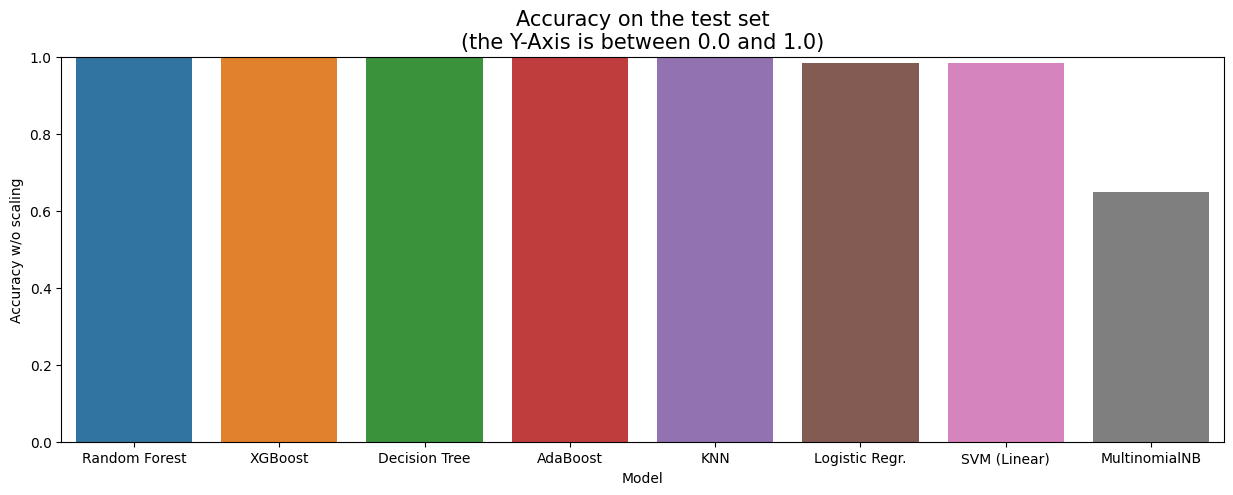

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy w/o scaling', data = df_acc)
plt.title('Accuracy on the test set\n(the Y-Axis is between 0.0 and 1.0)', fontsize = 15)
plt.ylim(0.0,1)
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

#### UDP 

In [ ]:
# create regressor object
udp_rf = RandomForestRegressor()

# fit the regressor with x and y data
udp_rf.fit(udp_train,udp_train_label)
predi = udp_rf.predict(udp_test)
accuracy_score(predi.round(), udp_test_label)

1.0

Text(0, 0.5, 'Importance ')

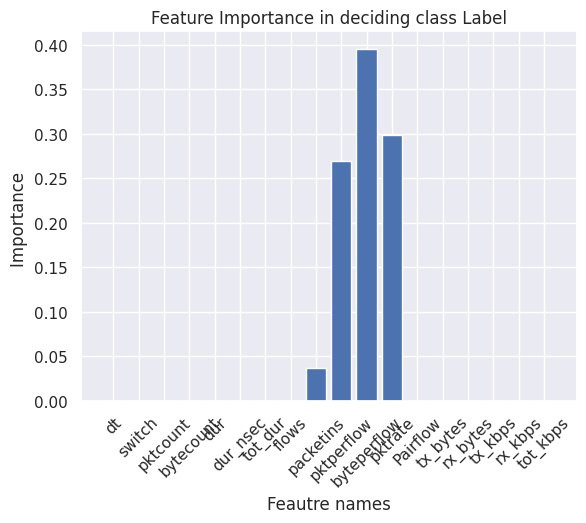

In [ ]:
# 
plt.bar(udp_df.columns[:-1], udp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

#### TCP 

In [ ]:
# create regressor object
tcp_rf = RandomForestRegressor()

# fit the regressor with x and y data
tcp_rf.fit(tcp_train,tcp_train_label)
predi = tcp_rf.predict(tcp_test)
accuracy_score(predi.round(), tcp_test_label)

0.9997735250820972

Text(0, 0.5, 'Importance ')

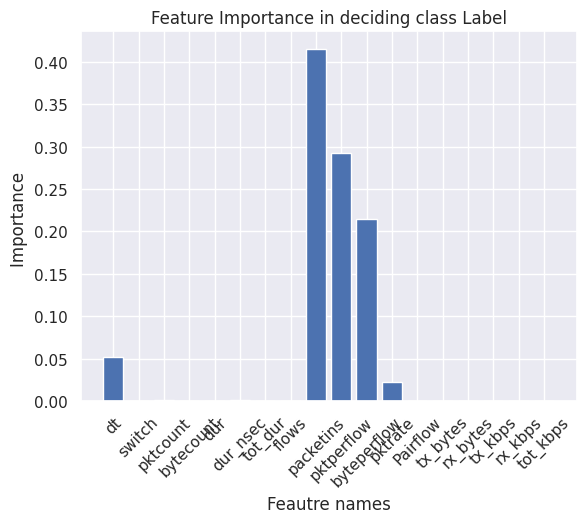

In [ ]:
plt.bar(tcp_df.columns[:-1], tcp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

#### ICMP

In [ ]:
# create regressor object
icmp_rf = RandomForestRegressor()

# fit the regressor with x and y data
icmp_rf.fit(icmp_train,icmp_train_label)
accuracy_score(icmp_rf.predict(icmp_test).round(), icmp_test_label)

1.0

Text(0, 0.5, 'Importance ')

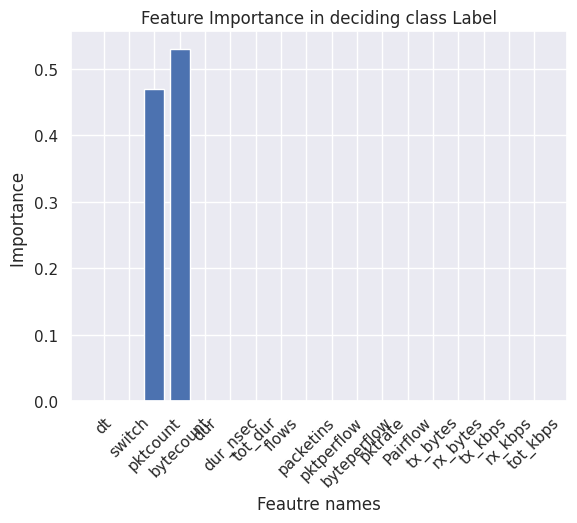

In [ ]:
plt.bar(icmp_df.columns[:-1], icmp_rf.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance in deciding class Label")
plt.xlabel("Feautre names")
plt.ylabel("Importance ")

##### As Accuracy for Random Forest is high . So choosing this model 

# Saving Random Forest Model

In [ ]:
import pickle

In [ ]:
# saving models in file
icmp_file='icmp_rf_model.sav'
udp_file='udp_rf_model.sav'
tcp_file='tcp_rf_model.sav'

pickle.dump(udp_rf, open(udp_file, 'wb'))
pickle.dump(tcp_rf, open(tcp_file, 'wb'))
pickle.dump(icmp_rf, open(icmp_file, 'wb'))

In [ ]:
# loading models
# icmp_rf=pickle.load(open(icmp_file,'rb'))

## Combined Accuracy of the attack for particular algorithm

### KNN

In [ ]:
df.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

In [ ]:
#separating input and output attributes
x1 = df.drop(['label'], axis=1)
y1 = df['label']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(72687, 22) (31152, 22)


In [ ]:
Classifier_accuracy = []

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))


# knn_clf = KNeighborsClassifier()
# knn_clf.fit(icmp_train, icmp_train)
# y_pred = knn_clf.predict(X_test)
# accuracy = metrics.accuracy_score(y_test, y_pred)
# Classifier_accuracy.append(accuracy*100)
# print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

ValueError: ignored

### SVM

In [ ]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

### Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

### Naive Bayes Classifier

In [ ]:
nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100))

### XGBoost Classifier

In [ ]:
xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))

### Comparative Analysis of models

In [ ]:
Classifier_names = ["KNN", "SVM", "Decision Tree","Naive Bayes","XGBoost"]

In [ ]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

### Visualzing accuracy of models

In [ ]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)